# Housing Blight Analysis

**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

# Plotly
# import plotly.express as px
# import plotly.offline as py
# import plotly.graph_objs as go

#import pandas_profiling
# from pandas_profiling import ProfileReport
# import sweetviz

#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
#from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
#from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

# Use Folium library to plot values on a map.
#import folium

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


**==========================================================================================================**

## Import Data

In [2]:
df = pd.read_csv("blight.csv", low_memory=False)

**==========================================================================================================**

## Data Quick Glance

In [3]:
df.head()

,building_id,blighted,violation_count,violation_judgement_amount,violation_category_0_count,violation_category_1_count,violation_no_pay_applied_count,violation_full_pay_count,violation_no_pay_on_rec_count,violation_partial_pay_count,call_count,call_avg_rating,call_ticket_open_count,call_ticket_archived_count,call_ticket_acknowledged_count,call_ticket_closed_count,call_res_snow_removal_count,call_illegal_dumping_count,call_trash_improper_placement_count,call_running_water_count,call_water_main_break_count,call_traffic_sign_count,call_trash_bulk_waste_count,call_abandoned_vehicle_count,call_manhole_cover_count,call_curbside_solid_waste_count,call_dpw_others_count,call_dpw_debris_removal_count,call_graffiti_count,call_st_light_pole_down_count,call_potholes_count,call_traffic_signal_count,call_tree_count,call_fire_hydrant_count,call_clogged_drain_count,call_other_type_count,crime_count,crime_other_crime_count,crime_environment_count,crime_fraud_count,crime_aggravated_assault_count,crime_robbery_count,crime_burglary_count,crime_other_burglary_count,crime_homicide_count,crime_assault_count,crime_weapons_offenses_count,crime_kidnaping_count,crime_traffic_violations-driving_on_suspended_count,crime_obstructing_the_police_count,crime_obstructing_judiciary_count,crime_dangerous_drugs_count,crime_stolen_vehicle_count,crime_arson_count,crime_damage_to_property_count,crime_family_offense_count,crime_larceny_count,crime_health-safety_count,crime_ouil_dispose_of_vehicle_to_avoid_forfeiture_count,crime_escape_count,crime_extortion_count,crime_solicitation_count,crime_forgery_count,crime_public_peace_count,crime_stolen_property_count,crime_bribery_count,crime_traffic_violations-motorcycle_violations_count,crime_runaway_count
0,91,1,2.00,225.00,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,96,1,1.00,140.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,275,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,391,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,392,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11076 entries, 0 to 11075
Data columns (total 68 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   building_id                                              11076 non-null  int64  
 1   blighted                                                 11076 non-null  int64  
 2   violation_count                                          11076 non-null  float64
 3   violation_judgement_amount                               11076 non-null  float64
 4   violation_category_0_count                               11076 non-null  float64
 5   violation_category_1_count                               11076 non-null  float64
 6   violation_no_pay_applied_count                           11076 non-null  float64
 7   violation_full_pay_count                                 11076 non-null  float64
 8   violation_no_pay_on_rec_co

In [5]:
df.dtypes.value_counts()

float64    66
int64       2
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,building_id,blighted,violation_count,violation_judgement_amount,violation_category_0_count,violation_category_1_count,violation_no_pay_applied_count,violation_full_pay_count,violation_no_pay_on_rec_count,violation_partial_pay_count,call_count,call_avg_rating,call_ticket_open_count,call_ticket_archived_count,call_ticket_acknowledged_count,call_ticket_closed_count,call_res_snow_removal_count,call_illegal_dumping_count,call_trash_improper_placement_count,call_running_water_count,call_water_main_break_count,call_traffic_sign_count,call_trash_bulk_waste_count,call_abandoned_vehicle_count,call_manhole_cover_count,call_curbside_solid_waste_count,call_dpw_others_count,call_dpw_debris_removal_count,call_graffiti_count,call_st_light_pole_down_count,call_potholes_count,call_traffic_signal_count,call_tree_count,call_fire_hydrant_count,call_clogged_drain_count,call_other_type_count,crime_count,crime_other_crime_count,crime_environment_count,crime_fraud_count,crime_aggravated_assault_count,crime_robbery_count,crime_burglary_count,crime_other_burglary_count,crime_homicide_count,crime_assault_count,crime_weapons_offenses_count,crime_kidnaping_count,crime_traffic_violations-driving_on_suspended_count,crime_obstructing_the_police_count,crime_obstructing_judiciary_count,crime_dangerous_drugs_count,crime_stolen_vehicle_count,crime_arson_count,crime_damage_to_property_count,crime_family_offense_count,crime_larceny_count,crime_health-safety_count,crime_ouil_dispose_of_vehicle_to_avoid_forfeiture_count,crime_escape_count,crime_extortion_count,crime_solicitation_count,crime_forgery_count,crime_public_peace_count,crime_stolen_property_count,crime_bribery_count,crime_traffic_violations-motorcycle_violations_count,crime_runaway_count
count,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00
mean,76369.21,0.50,1.83,831.17,1.83,0.01,1.51,0.24,0.06,0.03,0.08,0.17,0.00,0.04,0.01,0.03,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.43,0.00,0.00,0.02,0.03,0.01,0.03,0.00,0.00,0.06,0.00,0.00,0.03,0.00,0.01,0.01,0.02,0.00,0.03,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.00
std,47086.72,0.50,2.76,1921.39,2.74,0.25,2.53,0.70,0.43,0.21,0.35,0.69,0.02,0.22,0.12,0.21,0.02,0.15,0.02,0.11,0.05,0.06,0.04,0.07,0.05,0.03,0.01,0.02,0.00,0.02,0.10,0.04,0.13,0.06,0.12,0.00,2.45,0.05,0.03,0.16,0.22,0.10,0.22,0.02,0.05,0.38,0.07,0.03,1.29,0.03,0.08,0.14,0.20,0.05,0.23,0.03,0.40,0.02,0.05,0.07,0.02,0.05,0.03,0.03,0.03,0.06,0.77,0.26
min,80.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,34152.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,75662.00,0.50,1.00,170.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,building_id,blighted,violation_count,violation_judgement_amount,violation_category_0_count,violation_category_1_count,violation_no_pay_applied_count,violation_full_pay_count,violation_no_pay_on_rec_count,violation_partial_pay_count,call_count,call_avg_rating,call_ticket_open_count,call_ticket_archived_count,call_ticket_acknowledged_count,call_ticket_closed_count,call_res_snow_removal_count,call_illegal_dumping_count,call_trash_improper_placement_count,call_running_water_count,call_water_main_break_count,call_traffic_sign_count,call_trash_bulk_waste_count,call_abandoned_vehicle_count,call_manhole_cover_count,call_curbside_solid_waste_count,call_dpw_others_count,call_dpw_debris_removal_count,call_graffiti_count,call_st_light_pole_down_count,call_potholes_count,call_traffic_signal_count,call_tree_count,call_fire_hydrant_count,call_clogged_drain_count,call_other_type_count,crime_count,crime_other_crime_count,crime_environment_count,crime_fraud_count,crime_aggravated_assault_count,crime_robbery_count,crime_burglary_count,crime_other_burglary_count,crime_homicide_count,crime_assault_count,crime_weapons_offenses_count,crime_kidnaping_count,crime_traffic_violations-driving_on_suspended_count,crime_obstructing_the_police_count,crime_obstructing_judiciary_count,crime_dangerous_drugs_count,crime_stolen_vehicle_count,crime_arson_count,crime_damage_to_property_count,crime_family_offense_count,crime_larceny_count,crime_health-safety_count,crime_ouil_dispose_of_vehicle_to_avoid_forfeiture_count,crime_escape_count,crime_extortion_count,crime_solicitation_count,crime_forgery_count,crime_public_peace_count,crime_stolen_property_count,crime_bribery_count,crime_traffic_violations-motorcycle_violations_count,crime_runaway_count
count,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00,11076.00
mean,76369.21,0.50,1.83,831.17,1.83,0.01,1.51,0.24,0.06,0.03,0.08,0.17,0.00,0.04,0.01,0.03,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.43,0.00,0.00,0.02,0.03,0.01,0.03,0.00,0.00,0.06,0.00,0.00,0.03,0.00,0.01,0.01,0.02,0.00,0.03,0.00,0.05,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.00
std,47086.72,0.50,2.76,1921.39,2.74,0.25,2.53,0.70,0.43,0.21,0.35,0.69,0.02,0.22,0.12,0.21,0.02,0.15,0.02,0.11,0.05,0.06,0.04,0.07,0.05,0.03,0.01,0.02,0.00,0.02,0.10,0.04,0.13,0.06,0.12,0.00,2.45,0.05,0.03,0.16,0.22,0.10,0.22,0.02,0.05,0.38,0.07,0.03,1.29,0.03,0.08,0.14,0.20,0.05,0.23,0.03,0.40,0.02,0.05,0.07,0.02,0.05,0.03,0.03,0.03,0.06,0.77,0.26
min,80.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,34152.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,75662.00,0.50,1.00,170.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00

In [8]:
df.columns

Index(['building_id', 'blighted', 'violation_count', 'violation_judgement_amount', 'violation_category_0_count', 'violation_category_1_count', 'violation_no_pay_applied_count', 'violation_full_pay_count', 'violation_no_pay_on_rec_count', 'violation_partial_pay_count', 'call_count', 'call_avg_rating', 'call_ticket_open_count', 'call_ticket_archived_count', 'call_ticket_acknowledged_count', 'call_ticket_closed_count', 'call_res_snow_removal_count', 'call_illegal_dumping_count', 'call_trash_improper_placement_count', 'call_running_water_count', 'call_water_main_break_count', 'call_traffic_sign_count', 'call_trash_bulk_waste_count', 'call_abandoned_vehicle_count', 'call_manhole_cover_count', 'call_curbside_solid_waste_count', 'call_dpw_others_count', 'call_dpw_debris_removal_count', 'call_graffiti_count', 'call_st_light_pole_down_count', 'call_potholes_count', 'call_traffic_signal_count', 'call_tree_count', 'call_fire_hydrant_count', 'call_clogged_drain_count', 'call_other_type_count',
   

In [9]:
df.shape

(11076, 68)

In [10]:
df.isnull().sum()

building_id                                             0
blighted                                                0
violation_count                                         0
violation_judgement_amount                              0
violation_category_0_count                              0
                                                       ..
crime_public_peace_count                                0
crime_stolen_property_count                             0
crime_bribery_count                                     0
crime_traffic_violations-motorcycle_violations_count    0
crime_runaway_count                                     0
Length: 68, dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop(['building_id', 'violation_judgement_amount', 'violation_category_0_count', 'violation_category_1_count', 
         'violation_no_pay_applied_count', 'violation_full_pay_count', 'violation_no_pay_on_rec_count', 'violation_partial_pay_count'], axis=1, inplace=True)

In [13]:
df.columns

Index(['blighted', 'violation_count', 'call_count', 'call_avg_rating', 'call_ticket_open_count', 'call_ticket_archived_count', 'call_ticket_acknowledged_count', 'call_ticket_closed_count', 'call_res_snow_removal_count', 'call_illegal_dumping_count', 'call_trash_improper_placement_count', 'call_running_water_count', 'call_water_main_break_count', 'call_traffic_sign_count', 'call_trash_bulk_waste_count', 'call_abandoned_vehicle_count', 'call_manhole_cover_count', 'call_curbside_solid_waste_count', 'call_dpw_others_count', 'call_dpw_debris_removal_count', 'call_graffiti_count', 'call_st_light_pole_down_count', 'call_potholes_count', 'call_traffic_signal_count', 'call_tree_count', 'call_fire_hydrant_count', 'call_clogged_drain_count', 'call_other_type_count', 'crime_count', 'crime_other_crime_count', 'crime_environment_count', 'crime_fraud_count', 'crime_aggravated_assault_count', 'crime_robbery_count', 'crime_burglary_count', 'crime_other_burglary_count', 'crime_homicide_count',
       'c

In [14]:
df.drop(['call_avg_rating', 'call_ticket_open_count', 'call_ticket_archived_count', 'call_ticket_acknowledged_count', 
         'call_ticket_closed_count', 'call_res_snow_removal_count', 'call_illegal_dumping_count', 
         'call_trash_improper_placement_count', 'call_running_water_count', 'call_water_main_break_count', 
         'call_traffic_sign_count', 'call_trash_bulk_waste_count', 'call_abandoned_vehicle_count', 
         'call_manhole_cover_count', 'call_curbside_solid_waste_count', 'call_dpw_others_count', 
         'call_dpw_debris_removal_count', 'call_graffiti_count', 'call_st_light_pole_down_count', 'call_potholes_count', 
         'call_traffic_signal_count', 'call_tree_count', 'call_fire_hydrant_count', 'call_clogged_drain_count', 
         'call_other_type_count'], axis=1, inplace=True)

In [15]:
df.columns

Index(['blighted', 'violation_count', 'call_count', 'crime_count', 'crime_other_crime_count', 'crime_environment_count', 'crime_fraud_count', 'crime_aggravated_assault_count', 'crime_robbery_count', 'crime_burglary_count', 'crime_other_burglary_count', 'crime_homicide_count', 'crime_assault_count', 'crime_weapons_offenses_count', 'crime_kidnaping_count', 'crime_traffic_violations-driving_on_suspended_count', 'crime_obstructing_the_police_count', 'crime_obstructing_judiciary_count', 'crime_dangerous_drugs_count', 'crime_stolen_vehicle_count', 'crime_arson_count', 'crime_damage_to_property_count', 'crime_family_offense_count', 'crime_larceny_count', 'crime_health-safety_count', 'crime_ouil_dispose_of_vehicle_to_avoid_forfeiture_count', 'crime_escape_count', 'crime_extortion_count', 'crime_solicitation_count', 'crime_forgery_count', 'crime_public_peace_count', 'crime_stolen_property_count', 'crime_bribery_count', 'crime_traffic_violations-motorcycle_violations_count',
       'crime_runawa

In [16]:
df.drop(['crime_other_crime_count', 'crime_environment_count', 'crime_fraud_count', 
         'crime_aggravated_assault_count', 'crime_robbery_count', 'crime_burglary_count', 
         'crime_other_burglary_count', 'crime_homicide_count', 'crime_assault_count', 
         'crime_weapons_offenses_count', 'crime_kidnaping_count', 
         'crime_traffic_violations-driving_on_suspended_count', 'crime_obstructing_the_police_count', 
         'crime_obstructing_judiciary_count', 'crime_dangerous_drugs_count', 
         'crime_stolen_vehicle_count', 'crime_arson_count', 'crime_damage_to_property_count', 
         'crime_family_offense_count', 'crime_larceny_count', 'crime_health-safety_count', 
         'crime_ouil_dispose_of_vehicle_to_avoid_forfeiture_count', 'crime_escape_count', 
         'crime_extortion_count', 'crime_solicitation_count', 'crime_forgery_count', 
         'crime_public_peace_count', 'crime_stolen_property_count', 'crime_bribery_count', 
         'crime_traffic_violations-motorcycle_violations_count',
         'crime_runaway_count'], axis=1, inplace=True)

In [17]:
df.head()

,blighted,violation_count,call_count,crime_count
0,1,2.00,0.00,0.00
1,1,1.00,0.00,0.00
2,1,0.00,0.00,0.00
3,1,0.00,0.00,0.00
4,1,0.00,0.00,0.00


In [18]:
df.columns

Index(['blighted', 'violation_count', 'call_count', 'crime_count'], dtype='object')

In [19]:
df2 = df[['violation_count', 'call_count', 'crime_count', 'blighted']]
df2

,violation_count,call_count,crime_count,blighted
0,2.00,0.00,0.00,1
1,1.00,0.00,0.00,1
2,0.00,0.00,0.00,1
3,0.00,0.00,0.00,1
4,0.00,0.00,0.00,1
...,...,...,...,...
11071,1.00,0.00,0.00,0
11072,1.00,0.00,0.00,0
11073,0.00,0.00,1.00,0
11074,0.00,0.00,1.00,0


In [20]:
#df2.to_csv("blight2.csv", index=False)

**==========================================================================================================**

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

## Sample a smaller dataset

In [21]:
df = pd.read_csv("blight2.csv")

In [22]:
df = df.sample(frac=0.5)

In [23]:
df

,violation_count,call_count,crime_count,blighted
9509,2.00,0.00,0.00,0
651,0.00,0.00,0.00,1
3443,1.00,0.00,0.00,1
5646,1.00,0.00,0.00,0
8278,0.00,0.00,2.00,0
...,...,...,...,...
6886,0.00,0.00,2.00,0
4012,0.00,0.00,0.00,1
5447,3.00,0.00,0.00,1
241,12.00,0.00,0.00,1


In [24]:
df.reset_index(drop=True, inplace=True)

In [25]:
df

,violation_count,call_count,crime_count,blighted
0,2.00,0.00,0.00,0
1,0.00,0.00,0.00,1
2,1.00,0.00,0.00,1
3,1.00,0.00,0.00,0
4,0.00,0.00,2.00,0
...,...,...,...,...
5533,0.00,0.00,2.00,0
5534,0.00,0.00,0.00,1
5535,3.00,0.00,0.00,1
5536,12.00,0.00,0.00,1


In [26]:
df.shape

(5538, 4)

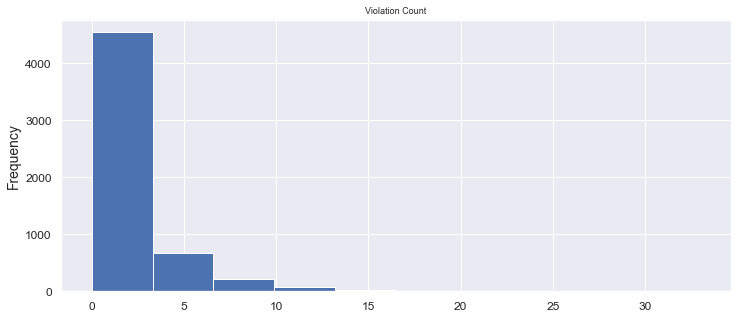

In [27]:
df.violation_count.plot(kind = "hist", figsize = (12,5), fontsize = 12, title="Violation Count")
plt.show()

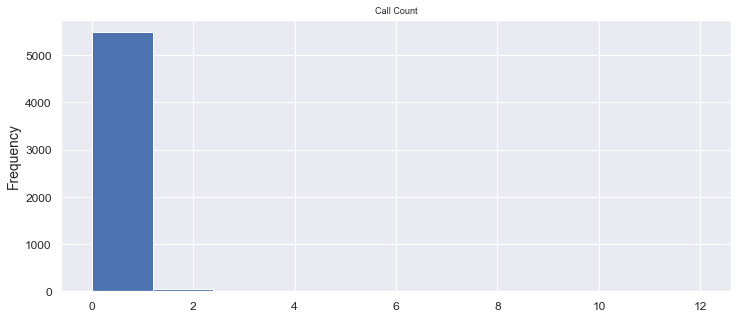

In [28]:
df.call_count.plot(kind = "hist", figsize = (12,5), fontsize = 12, title="Call Count")
plt.show()

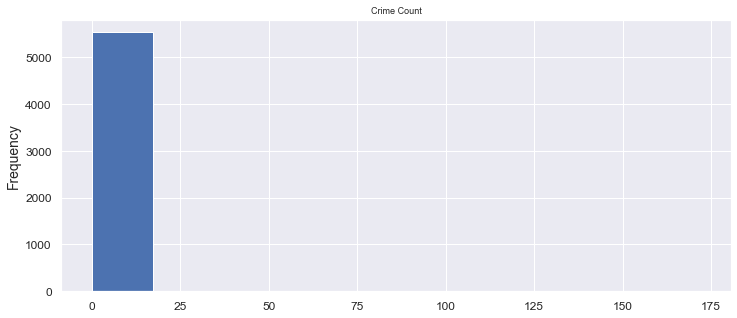

In [29]:
df.crime_count.plot(kind = "hist", figsize = (12,5), fontsize = 12, title="Crime Count")
plt.show()

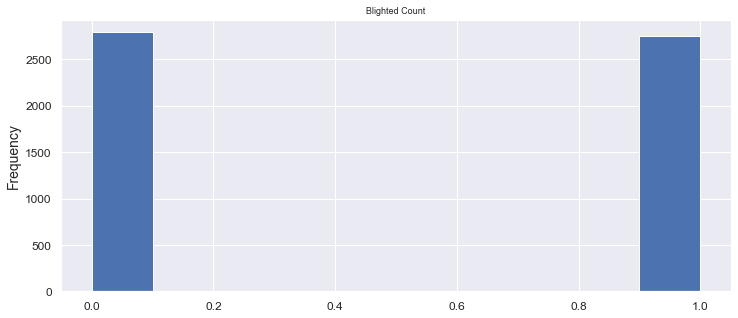

In [30]:
df.blighted.plot(kind = "hist", figsize = (12,5), fontsize = 12, title="Blighted Count")
plt.show()

**==========================================================================================================**

## Groupby

Most commonly, we use `groupby()` to split the data into groups,this will apply some function to each of the groups (e.g. mean, median, min, max, count), then combine the results into a data structure. For example, let's select the 'VALUE' column and calculate the mean of the gasoline prices per year. First, we specify the 'Year" column, following by the 'VALUE' column, and the `mean()` function.

In [31]:
df.columns

Index(['violation_count', 'call_count', 'crime_count', 'blighted'], dtype='object')

In [32]:
df.groupby(['blighted'], as_index=True).mean()

,violation_count,call_count,crime_count
blighted,,,
0,1.96,0.14,0.80
1,1.71,0.02,0.07


**==========================================================================================================**

# Data Visualization

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is Matplotlib.  As mentioned on their website:

> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer.



## Seaborn Library

### 1. Numerical Data Ploting
- relplot()
- scatterplot()
- lineplot()

### 2. Categorical Data Ploting
- catplot()
- boxplot()
- stripplot()
- swarmplot()
- etc...

### 3. Visualizing Distribution of the Data
- distplot()
- kdeplot()
- jointplot()
- rugplot()

### 4. Linear Regression and Relationship
- regplot()
- lmplot()

### 5. Controlling Ploted Figure Aesthetics
- figure styling
- axes styling
- color palettes
- etc..

## Subplots

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,

```python
   subplot(211) == subplot(2, 1, 1) 
```

produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).

In [33]:
# Check plot styles
#plt.style.available

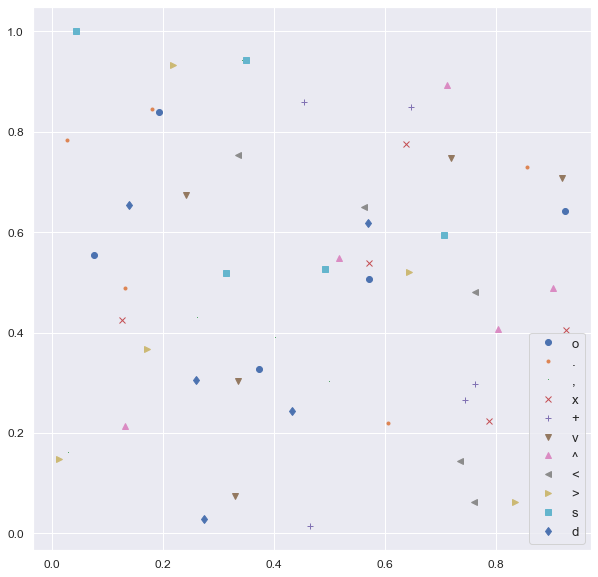

In [34]:
markers = ['o','.',',','x','+','v','^','<','>','s','d']

plt.figure(figsize=(10,10))

for m in markers:
    plt.plot(np.random.rand(5),np.random.rand(5),m,label=m)

plt.legend()
plt.show()

## FacetGrid (Building structured multi-plot grids)

The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A FacetGrid can be drawn with up to three dimensions: row, col, and hue. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

Each of relplot(), displot(), catplot(), and lmplot() use this object internally, and they return the object when they are finished so that it can be used for further tweaking.

### Seaborn Version

In [35]:
df.columns

Index(['violation_count', 'call_count', 'crime_count', 'blighted'], dtype='object')

`
sns.FacetGrid(data,  row=None,  col=None,  hue=None,  col_wrap=None,
    sharex=True, sharey=True,  height=3,  aspect=1,  palette=None,  row_order=None,  col_order=None,
    hue_order=None,  hue_kws=None,  dropna=False, legend_out=True,  despine=True,
    margin_titles=False,  xlim=None,  ylim=None,  subplot_kws=None,  gridspec_kws=None, size=None)
`

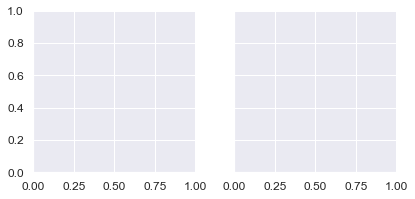

In [36]:
sns.FacetGrid(data=df, col="blighted")

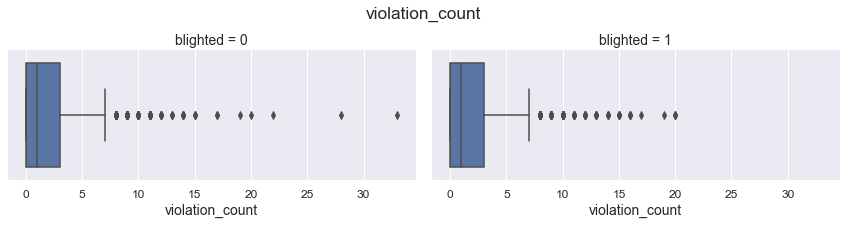

In [37]:
g = sns.FacetGrid(data=df, col="blighted", height=3, aspect=2)

g.map(sns.boxplot, "violation_count")

g.fig.suptitle("violation_count", y=1.05)


plt.show()

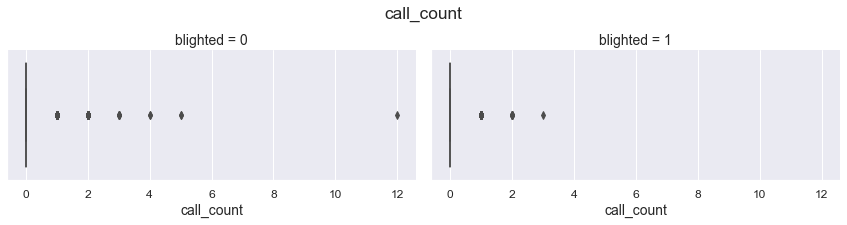

In [38]:
g = sns.FacetGrid(data=df, col="blighted", height=3, aspect=2)

g.map(sns.boxplot, "call_count")

g.fig.suptitle("call_count", y=1.05)


plt.show()

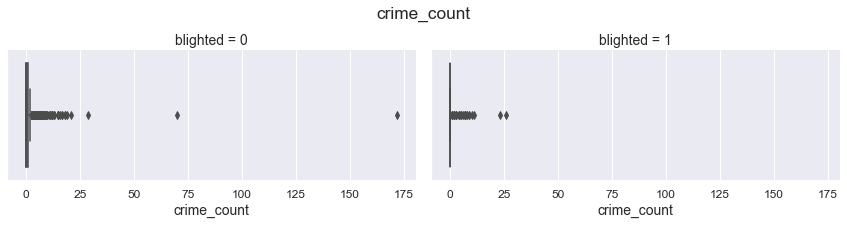

In [39]:
g = sns.FacetGrid(data=df, col="blighted", height=3, aspect=2)

g.map(sns.boxplot, "crime_count")

g.fig.suptitle("crime_count", y=1.05)


plt.show()

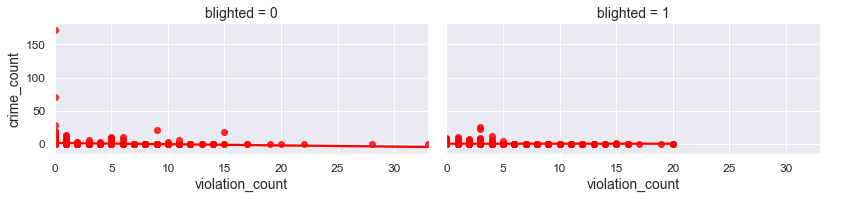

In [40]:
g = sns.FacetGrid(data=df, col="blighted", hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.regplot, "violation_count", "crime_count", color="red", fit_reg=True, x_jitter=None)
g.add_legend()
plt.show()

**==========================================================================================================**

## Violin Plot

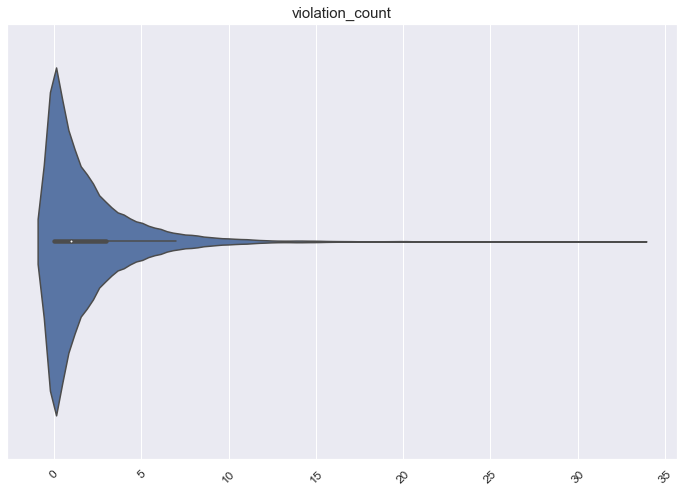

In [41]:
fig, ax = plt.subplots(figsize=(12,8))

sns.violinplot(x="violation_count", y=None, hue="blighted", data=df)

ax.set_title('violation_count', size=15)
ax.tick_params('x', labelrotation=45)
ax.set_xlabel("")
ax.set_ylabel("")
#ax.legend()

plt.show()

## Heatmap

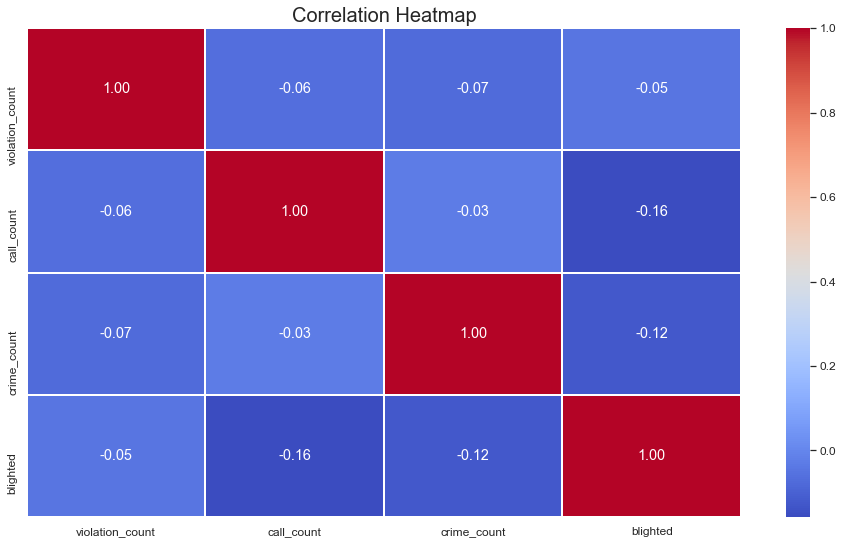

In [42]:
plt.figure(figsize=(16,9))
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()